In [1]:
# git clone package:
# !git clone <path_package>
# or copy package :
!cp -r /kaggle/input/autonlp-git/SentimentML-main /kaggle/working

In [2]:
import os
# directory of package :
fd = os.open("/kaggle/working/SentimentML-main", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/SentimentML-main'

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 561 kB 807 kB/s 
     |████████████████████████████████| 7.7 MB 14.7 MB/s 
     |████████████████████████████████| 280 kB 61.3 MB/s 
     |████████████████████████████████| 11.6 MB 49.8 MB/s 
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 6.4 MB/s 
     |████████████████████████████████| 23.9 MB 37.1 MB/s 
     |████████████████████████████████| 2.6 MB 47.1 MB/s 
     |████████████████████████████████| 283 kB 54.8 MB/s 
     |████████████████████████████████| 70 kB 6.3 MB/s 
     |████████████████████████████████| 10.8 MB 46.9 MB/s 
     |████████████████████████████████| 301 kB 52.1 MB/s 
     |████████████████████████████████| 166.7 MB 11 kB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 12.8 MB 50.9 MB/s 
     |████████████████████████████████| 394.3 MB 7.6 kB/s 
     |████████████████████████████████| 47.5 MB 62.5 MB/s 
     |███████████

In [4]:
!pip install -U sentence-transformers

  Using cached sentence_transformers-2.0.0-py3-none-any.whl
  Using cached huggingface_hub-0.0.17-py3-none-any.whl (52 kB)
     |████████████████████████████████| 2.9 MB 903 kB/s 
  Attempting uninstall: transformers
    Found existing installation: transformers 4.0.1
    Uninstalling transformers-4.0.1:
      Successfully uninstalled transformers-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 1.3.0 requires transformers<4.1,>=4.0, but you have transformers 4.11.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
# if png doesn't save correctly
!pip install kaleido

     |████████████████████████████████| 79.9 MB 108 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
# if spacy can't load spacy model :
!python3 -m spacy download fr_core_news_md

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 46.1 MB 7.2 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.3.0-py3-none-any.whl size=46100669 sha256=abb3b9e3be21f98d99240e378dffe418fc605f20e344961983f5ec3112db6b44
  Stored in directory: /tmp/pip-ephem-wheel-cache-y08fowuv/wheels/62/a5/93/9c82d8ae84430ed80720262c11726d046d3444af301b7d2895
Successfully built fr-core-news-md
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


# Import

In [7]:
import pandas as pd
from autonlp.autonlp import AutoNLP
import os
from pathlib import Path
from autonlp.flags import Flags, save_yaml
import dataclasses

# Flags update (parameters)

In [8]:
# add logs from optimization to outdir :
!cp -r /kaggle/input/logs-optimization/logs /kaggle/working/logs

In [9]:
#####################
# Parameters
#####################

flags_dict_info = {
    "path_data": "/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv",
    "path_data_validation": "",
    "apply_logs": True,
    "outdir": "/kaggle/working/logs",
    "seed": 15,
    "debug": False,  # for debug : use only 50 data rows for training
}
flags_dict_preprocessing = {
    "column_text": "text_fr",  # name column with texts
    "target": "sentiment",     # name column with targets
    "language_text": "fr",
    "apply_small_clean": True,
    "name_spacy_model": "fr_core_news_md",
    "apply_spacy_preprocessing": True,
    "apply_entity_preprocessing": True
}

flags_dict_autonlp = {
    "objective": 'multi-class',    # 'binary' or 'multi-class' or 'regression'
    
    "embedding": {"tf": 1, "tf-idf": 2, "word2vec": None, "fasttext": None, "doc2vec": None, "transformer": None},
    
    "classifier": {"Naive_Bayes": [1], "Logistic_Regression": [1], "SGD_Classifier": [2],
                   "XGBoost": [], "Global_Average": [], "Attention": [], "BiRNN": [], "BiRNN_Attention": [],
                   "biLSTM": [], "BiLSTM_Attention": [], "biGRU": [], "BiGRU_Attention": []},
    
    "max_run_time_per_model": 60,
    "frac_trainset": 0.7,
    "scoring": 'f1',
    "average_scoring": "macro",
    "nfolds": 5,
    "nfolds_train": 5,
    "class_weight": True,
    "apply_blend_model": True,
    "verbose": 2,
    "method_embedding": {'Word2vec': 'Word2Vec',
                         'Fasttext': 'FastText',
                         'Doc2Vec': 'Doc2Vec',
                         'Transformer': 'CamemBERT',
                         'spacy': [(['ADJ', 'NOUN', 'VERB'], True)]},

    "apply_optimization": False,
    "apply_validation": True,
    
    "batch_size":32,
    "tr_learning_rate": [3e-5],
    "tr_maxlen": 100,
    "patience":2
}

flags_dict_display = {
    "sort_leaderboard": 'f1'
}

flags = Flags().update(flags_dict_info)
flags = flags.update(flags_dict_preprocessing)
flags = flags.update(flags_dict_autonlp)
flags = flags.update(flags_dict_display)
print("flags :", flags)
debug = flags.debug
outdir = Path(flags.outdir)
os.makedirs(str(outdir), exist_ok=True)
flags_dict = dataclasses.asdict(flags)
save_yaml(outdir / "flags.yaml", flags_dict)

flags : Flags(path_data='/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv', path_data_validation='', apply_logs=True, outdir='/kaggle/working/logs', apply_mlflow=False, experiment_name='Experiment', apply_app=False, debug=False, seed=15, column_text='text_fr', language_text='fr', target='sentiment', apply_small_clean=True, name_spacy_model='fr_core_news_md', apply_spacy_preprocessing=True, apply_entity_preprocessing=True, objective='multi-class', embedding={'tf': 1, 'tf-idf': 2, 'word2vec': None, 'fasttext': None, 'doc2vec': None, 'transformer': None}, classifier={'Naive_Bayes': [1], 'Logistic_Regression': [1], 'SGD_Classifier': [2], 'XGBoost': [], 'Global_Average': [], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_Attention': []}, regressor={'SGD_Regressor': [1], 'XGBoost': [], 'Global_Average': [2], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_A

# Instantiation

In [10]:
autonlp = AutoNLP(flags)

# Preprocessing

In [11]:
%%time
autonlp.data_preprocessing()


Read data...

Begin preparation of 3876 data :

Training set size : 2713
Test set size : 1163

Begin preprocessing of 2713 train data :
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...

Begin preprocessing of 1163 test data :
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...
CPU times: user 26.5 s, sys: 4.05 s, total: 30.6 s
Wall time: 35.4 s


# Training

In [12]:
autonlp.train()

List of models : ['tf+Naive_Bayes_ADJ_NOUN_VERB_lem', 'tf+Logistic_Regression_ADJ_NOUN_VERB_lem', 'tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem']

tf+Naive_Bayes_ADJ_NOUN_VERB_lem Model:
Load parameters from models_parameters path...
apply_optimization is False and models_parameters path isn't provided, use best model parameters from /kaggle/working/logs/models_best_parameters.json.

- Training & Cross-Validation:
Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:

Scores :
accuracy = 0.7147
precision macro = 0.6613
recall macro = 0.6494
f1 score macro = 0.6544


Time validation : 2.726900625999974
In directory '/kaggle/working/logs/best_logs/tf/Naive_Bayes_ADJ_NOUN_VERB_lem', there is no registered model and has same parameters than model from last_logs. Copy models from last_logs to best_logs for tf+Naive_Bayes_ADJ_NOUN_VERB_lem.

tf+Logistic_Regression_ADJ_NOUN_VERB_lem Model:
Load parameters from models_parameters path...
apply_optimization is False and models_parameters path isn't provided, use b

# Leaderboard (Train score)

In [13]:
leaderboard_train = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='train')
print('Train Leaderboard')
leaderboard_train.to_csv(os.path.join(flags.outdir,'leaderboard_train.csv'), index=False)
leaderboard_train

Train Leaderboard


,name,accuracy_train,recall_macro_train,precision_macro_train,f1_macro_train
1,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.9975,0.9970,0.9958,0.9964
0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.9682,0.9749,0.9417,0.9566
2,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.9051,0.8969,0.8971,0.8966


# Leaderboard (Validation score)

In [14]:
leaderboard_val = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='val')
print('\nValidation Leaderboard')
leaderboard_val.to_csv(os.path.join(flags.outdir,'leaderboard_val.csv'), index=False)
leaderboard_val


Validation Leaderboard


,name,accuracy_val,recall_macro_val,precision_macro_val,f1_macro_val
3,BlendModel,0.7519,0.6837,0.7137,0.6961
2,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.7446,0.6838,0.7101,0.6955
1,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.7497,0.6682,0.7178,0.6880
0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.7147,0.6494,0.6613,0.6544


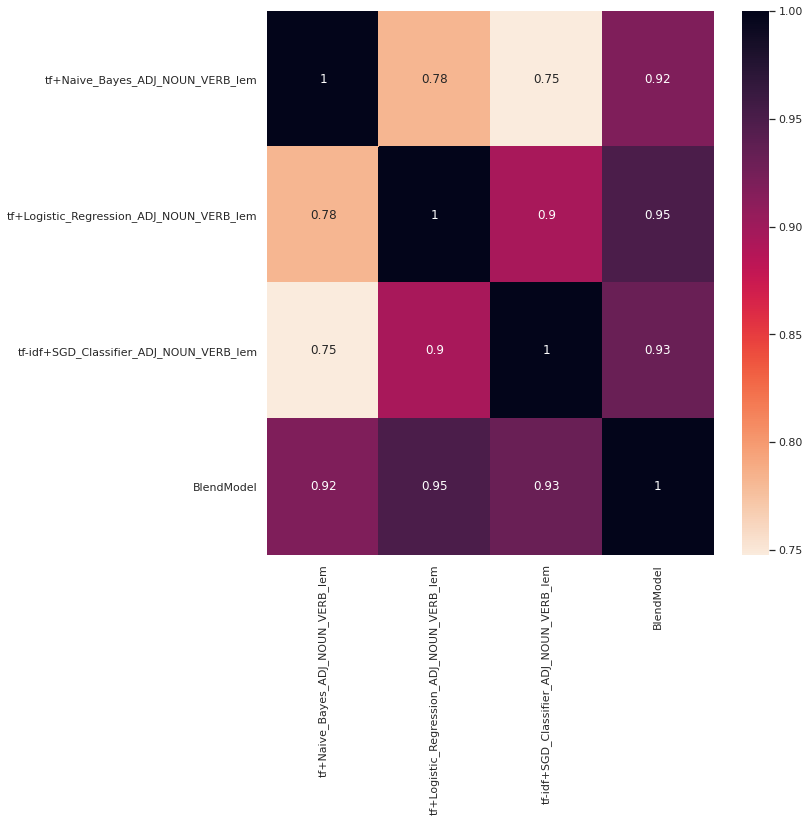

In [15]:
# correlation between oof_val predictions
autonlp.correlation_models()

In [16]:
#df_all_results = pd.read_csv("/kaggle/working/logs/df_all_results.csv")
#if len(df_all_results) > 0:
#    df_all_results_mean = df_all_results.groupby('model').mean().sort_values('mean_test_score', ascending=False)
#    print('\nGridSearch information Leaderboard')
#    df_all_results.to_csv(os.path.join(flags.outdir,'df_all_results_mean.csv'), index=False)
#    print(df_all_results_mean)

In [17]:
#df_all_results

In [18]:
#df_all_results.groupby(['model'])['mean_test_score'].max()

In [19]:
#from PIL import Image
#Image.open(os.path.join(flags.outdir, 'boxplot_df_all_results.png'))

In [20]:
try:
    Image.open(os.path.join(flags.outdir, 'last_logs', 'metric_scores_val.png'))
except:
    pass

# Testing on test set from train/test split

In [21]:
#name_logs = 'best_logs'
#on_test_data = True
#autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data)

In [22]:
#leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
#print('\nTest Leaderboard')
#leaderboard_test

# Testing on other test set

In [23]:
#data_test = pd.read_csv("/kaggle/input/finance-corpus/FinancialPhraseBank_test.csv")

In [24]:
#X_test, doc_spacy_data_test, Y_test = autonlp.preprocess_test_data(data_test)

In [25]:
#name_logs = 'best_logs'
#on_test_data = False
#autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data, x = X_test, y=Y_test,
#                       doc_spacy_data_test = doc_spacy_data_test)

In [26]:
#leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
#print('\nTest Leaderboard')
#leaderboard_test